<center>
<img src="https://cotia.tg/wp-content/uploads/2023/11/Communaute-Togolaise-dIntelligence-Artificielle.png" width="80%"/>
</center>


© Deep Learning IndabaX Togo 2023.

**Auteur: BABA Tchao A.**

**Sujets:**

Contentenu: <font color='blue'>`Réduction de dimension non supervisé linéaire (PCA)`</font>, <font color='blue'>`Réduction de dimension non supervisé non linéaire (t-sne)`</font>.

Niveau: <font color='red'>`Debutant`</font>, <font color='red'>`Intermediaire`</font>, <font color='red'>`Avancée`</font>

# Sommaire
<h1><font color = 'blue'> I- Fléau de la dimensionnalité</font></h1>
<font color='blue'><ol>
<h1 ><font color = 'blue'> II- Types d'algorithmes de Réduction de dimension des données</font</h1> <br>
<h1><font color = 'blue'>III-  Réduction de dimension non supervisé linéaire (PCA)</font></h1>
<font color='blue'><ol>
<li>Analyse Exploratoire des Données</li>
<li>Analyse en Composantes Principales sur les données de note des élèves </li>
</ol><font>
<h1><font color = 'blue'>IV- Réduction de dimension Non supervisé, non linéaire (t-snet)</font></h1>
<font color='blue'><ol>
<li>Le T-SNE sur les données générées(données lunes)</li>
<li>Le T-SNE sur les données Digits </li>
<li>Le T-SNE sur les données Olivetti Faces</li>
</ol><font>



<p>L’objectif de cette séance pratique est de présenter les algorithmes  du PCA et de t-SNE. Au passage, on vise à donner une meilleure compréhension de ces méthode dans la réduction de dimension des données. Pour cela, nous examinerons dans un premier temps un jeu de données synthétiques puis nous travaillerons sur des données réelles.</p>

<h3><font color = 'green'><font>Exploration des Bibliothèques nécessaires
</h3>

In [ ]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from matplotlib import offsetbox
import seaborn as sns

from scipy.spatial import distance_matrix

import sklearn
from sklearn.metrics import pairwise_distances
from sklearn import (manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection)
from sklearn.decomposition import PCA
from sklearn.datasets import make_moons
from sklearn.datasets import fetch_olivetti_faces
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

<a id="section1"></a>
<h1> <font color='red'>I- Fléau de la dimensionalité </font></h1>
Niveau: <font color='red'>`Debutant`</font>
<p>Pour démontrer l'impact de la dimensionalité sur la distance euclidienne, commençons par créer un ensemble de données composé de 100 observations dans un espace à 10 dimensions. Ces données générées suivent une distribution aléatoire uniforme.</p>
<p><font color ='grey'>La ligne de code x = np.random.rand(n, d) crée une matrice x de dimensions n par d en utilisant la fonction rand du module NumPy. Cette matrice est remplie de nombres aléatoires issus d'une distribution uniforme sur l'intervalle [0, 1).<font></p>

In [ ]:
n = 100
d = 10

x = np.random.rand(n, d)

<p>À l’aide de la fonction scipy.spatial.distance_matrix, nous pouvons calculer la matrice des distances euclidiennes entre toutes les paires de points. Nous allons ensuite la visualiser sous forme de matrice :</p>

In [ ]:
dist_matrix = pairwise_distances(x, metric='euclidean')
print(dist_matrix)


[[0.         1.33712927 0.72911423 ... 1.614253   1.07949983 1.24506271]
 [1.33712927 0.         1.16267869 ... 1.49173432 0.66303551 1.90741544]
 [0.72911423 1.16267869 0.         ... 1.39513077 1.01646727 1.4319092 ]
 ...
 [1.614253   1.49173432 1.39513077 ... 0.         1.31917141 1.56451861]
 [1.07949983 0.66303551 1.01646727 ... 1.31917141 0.         1.76782737]
 [1.24506271 1.90741544 1.4319092  ... 1.56451861 1.76782737 0.        ]]


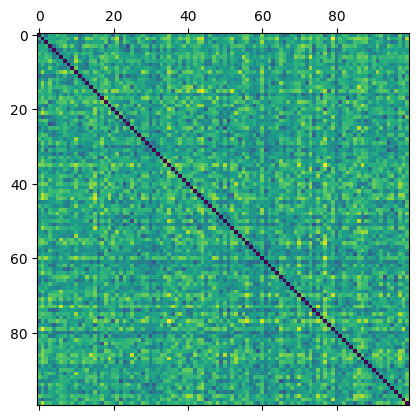

In [ ]:
distances = distance_matrix(x, x, p=2) # norme 2

plt.matshow(distances)
plt.show()

<p>Nous pouvons également définir un point de référence q et calculer sa distance à chaque point xi du jeu de données. Nous pouvons ensuite calculer le minimum et le maximum de ces distances.</p>
<p><font color = 'grey'>La ligne de code q = np.random.rand(d) crée un tableau unidimensionnel (vecteur) q de longueur d en utilisant la fonction rand du module NumPy. Chaque élément de ce vecteur est un nombre aléatoire issu d'une distribution uniforme sur l'intervalle [0, 1).<font></p>

In [ ]:
q = np.random.rand(d)
dists = np.array([np.linalg.norm(q -  xx) for xx in x])
print(np.min(dists))
print(np.max(dists))

0.6105288983551356
1.792905786752276


<h4> <font color='red'> Question: <font></h4>
<p>Augmentez la dimensionalité des données (variable d) et répétez les opérations précédentes. Que constatez-vous ? En quoi cela illustre le fléau de la dimensionalité ?</p>

<h4> <font color='green'> Réponse: <font></h4>

In [ ]:
d_aug = 100000

x_aug = np.random.rand(n, d_aug)

In [ ]:
dist_matrix = pairwise_distances(x_aug, metric='euclidean')
print(dist_matrix)

[[  0.         129.40496744 129.25094495 ... 129.40103408 129.0967505
  129.21084666]
 [129.40496744   0.         129.68471314 ... 129.56946879 129.04457761
  129.54163194]
 [129.25094495 129.68471314   0.         ... 129.16195604 129.4770589
  129.2313483 ]
 ...
 [129.40103408 129.56946879 129.16195604 ...   0.         128.9299858
  129.1926278 ]
 [129.0967505  129.04457761 129.4770589  ... 128.9299858    0.
  129.55522953]
 [129.21084666 129.54163194 129.2313483  ... 129.1926278  129.55522953
    0.        ]]


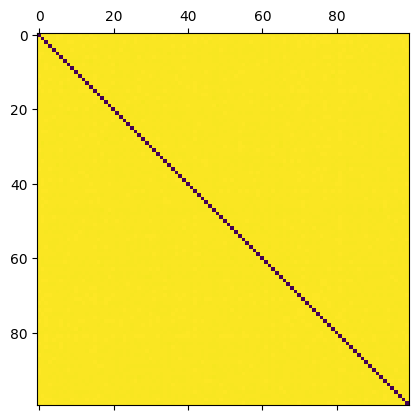

In [ ]:
distances_aug = distance_matrix(x_aug, x_aug, p=2) # norme 2

plt.matshow(distances_aug)
plt.show()

In [ ]:
q_aug = np.random.rand(d_aug)
dists_aug = np.array([np.linalg.norm(q_aug -  xx_aug) for xx_aug in x_aug])
print(np.min(dists_aug))
print(np.max(dists_aug))

128.61151725949074
129.62794124550453



<p>Lorsque l’on augmente la dimension des données, l’écart entre la distance minimale et la distance maximale se resserre. De la même façon, la matrice des distances devient de plus en plus homogène. Cela illustre que, pour des variables indépendantes, tous les points se retrouvent à peu près à la même distance des uns des autres quand la dimension augmente. Autrement dit, la distance euclidienne ne permet plus de séparer les différentes observations.</p>

<h1><font color = 'red'>II- Types d'algorithmes de réduction de dimension de données</font></h1> Niveau: <font color='red'>`Debutant`</font>

In [ ]:
# @title
import pandas as pd
# Création du tableau
data = {
    'Type de Réduction de Dimension': ['PCA', 'LDA', 't-SNE', 'Autoencodeurs Supervisés', 'SCA', 'Laplacian Eigenmaps supervisé'],
    'Supervisé/Non Supervisé': ['Non supervisé', 'Supervisé', 'Non supervisé', 'Supervisé', 'Supervisé', 'Supervisé'],
    'Linéaire/Non Linéaire': ['Linéaire', 'Linéaire', 'Non linéaire', 'Non linéaire', 'Linéaire', 'Non linéaire'],
    'Exemples': [
        'Réduction de dimension linéaire en maximisant la variance. Exemple : Réduction de dimension des caractéristiques d\'images.',
        'Maximise la séparation entre les classes. Exemple : Classification de visages.',
        'Visualisation non linéaire en conservant la similarité entre points. Exemple : Visualisation de données de haut niveau.',
        'Utilise un réseau de neurones pour apprendre une représentation. Exemple : Réduction de dimension pour la reconnaissance faciale.',
        'Maximise la variance entre les classes et minimise la variance à l\'intérieur des classes. Exemple : Classification de documents.',
        'Maintient les relations locales entre les points. Exemple : Reconnaissance de la parole.'
    ]
}

df = pd.DataFrame(data)
# Affichage du tableau
df




,Type de Réduction de Dimension,Supervisé/Non Supervisé,Linéaire/Non Linéaire,Exemples
0,PCA,Non supervisé,Linéaire,Réduction de dimension linéaire en maximisant ...
1,LDA,Supervisé,Linéaire,Maximise la séparation entre les classes. Exem...
2,t-SNE,Non supervisé,Non linéaire,Visualisation non linéaire en conservant la si...
3,Autoencodeurs Supervisés,Supervisé,Non linéaire,Utilise un réseau de neurones pour apprendre u...
4,SCA,Supervisé,Linéaire,Maximise la variance entre les classes et mini...
5,Laplacian Eigenmaps supervisé,Supervisé,Non linéaire,Maintient les relations locales entre les poin...


<a id="section2"></a>
<h1><font color='red'>III-  Réduction de dimension non supervisé linéaire (PCA)<font></h1>


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


<h2><font color='red'>1- Analyse exploratoire des données</font></h2>
Niveau: <font color='red'>`Debutant`</font>
<h4><font color='green'>Comprendre les données </font></h4>
<p>Notre jeu de données comprend les notes sur 20 de 29 élèves d'un lycée, en se concentrant spécifiquement sur cinq matières : les mathématiques, la physique, le français, l'anglais et le latin.</p>

In [ ]:
import os
print(os.listdir("/content/drive/MyDrive/IndabaXTogo/PraticalSession/"))

['FuelConsumptionCo2.csv', 'notes.xlsx', 'voiture.xls', 'images', 'Réduction de dimension.ipynb']


In [ ]:
file_path = "/content/drive/MyDrive/IndabaXTogo/PraticalSession/notes.xlsx"


<h3><font color = 'green'><font>Exploration des données</h3>
<h6><font color = 'green'><font>Affichage des données</h6>

In [ ]:
df = pd.read_excel(file_path)
print(df.head())


    INDIVIDU  Maths  Physique  Français  Anglais  Latin
0     Basile     14        15        13       12     11
1    Thierry      4         3         6        4     12
2  Genevieve     16        15         5        6     10
3     Odilon     19        18         6        6     12
4    Edouard     15        15        14       16     11


<h6><font color = 'green'><font>Etude Statistique sur les données</h6>

In [ ]:
df.shape

(29, 6)

In [ ]:
df.describe()

,Maths,Physique,Français,Anglais,Latin
count,29.000000,29.000000,29.000000,29.000000,29.000000
mean,11.482759,10.517241,10.862069,10.793103,11.137931
std,5.315884,5.526693,4.756380,4.857831,0.875220
min,2.000000,2.000000,2.000000,3.000000,10.000000
25%,6.000000,5.000000,6.000000,6.000000,10.000000
50%,12.000000,12.000000,12.000000,12.000000,11.000000
75%,16.000000,15.000000,14.000000,15.000000,12.000000
max,19.000000,18.000000,19.000000,18.000000,13.000000


<h6><font color = 'green'><font>Etude de la variance dans chaque matière</h6>

In [ ]:
df.var(axis=0)

<ipython-input-17-39e861f727fe>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var(axis=0)


Maths       28.258621
Physique    30.544335
Français    22.623153
Anglais     23.598522
Latin        0.766010
dtype: float64

In [ ]:
quartile1 = df.quantile(0.25)
quartile3 = df.quantile(0.75)

IQR = quartile3 - quartile1
print(IQR)

Maths       10.0
Physique    10.0
Français     8.0
Anglais      9.0
Latin        2.0
dtype: float64


<ipython-input-18-a9af77ccd537>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quartile1 = df.quantile(0.25)
<ipython-input-18-a9af77ccd537>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quartile3 = df.quantile(0.75)


<h4><font color = 'green'><font>Visualisation de la distribution de données</h4>
<h6><font color = 'green'><font>Le boxplot</h6>
<p>Le boxplot, également appelé boîte à moustaches, est un graphique statistique qui représente graphiquement la distribution d'un ensemble de données. Il se compose d'une boîte centrale qui représente le quartile inférieur (Q1) au quartile supérieur (Q3), une ligne à l'intérieur de la boîte pour représenter la médiane, et des « moustaches » qui s'étendent à partir de la boîte pour indiquer la dispersion des données. Les points situés en dehors des « moustaches » sont souvent considérés comme des valeurs aberrantes. Le boxplot permet ainsi de visualiser la tendance centrale, la dispersion, et d'identifier d'éventuelles valeurs extrêmes dans un ensemble de données.</p>

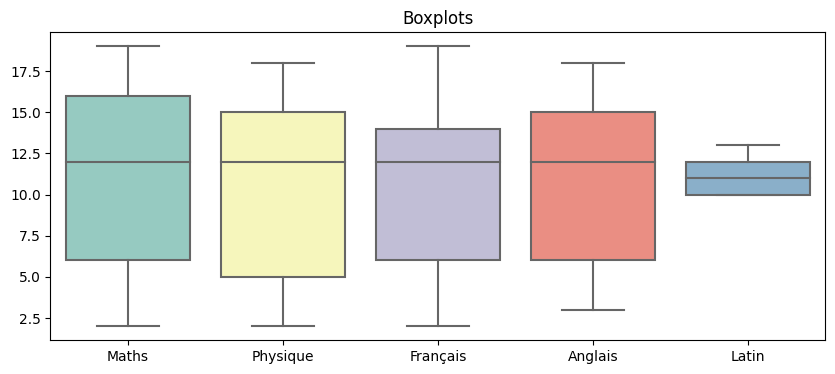

In [ ]:
#df.boxplot(figsize=(10,4))
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, palette="Set3")  # Vous pouvez choisir un autre nom de palette si vous le souhaitez
plt.title('Boxplots')
plt.show()

<h6><font color = 'green'><font>Le violinplot</h6>
<p>Le violinplot est un type de graphique statistique qui combine les caractéristiques d'un boxplot avec une représentation de la distribution des données. Il affiche une boîte à moustaches similaire à celle d'un boxplot, mais remplace les « moustaches » par des formes en forme de violon qui représentent la densité de probabilité des données. Les parties les plus larges du violon indiquent une plus grande densité de données, tandis que les parties plus étroites indiquent une densité plus faible. Les points à l'intérieur du violon représentent les valeurs individuelles. Le violinplot offre ainsi une vue plus détaillée de la distribution des données, permettant d'observer la forme et la symétrie de la distribution. Il est particulièrement utile lorsqu'il y a des variations significatives dans la densité des données le long de l'axe des valeurs.</p>

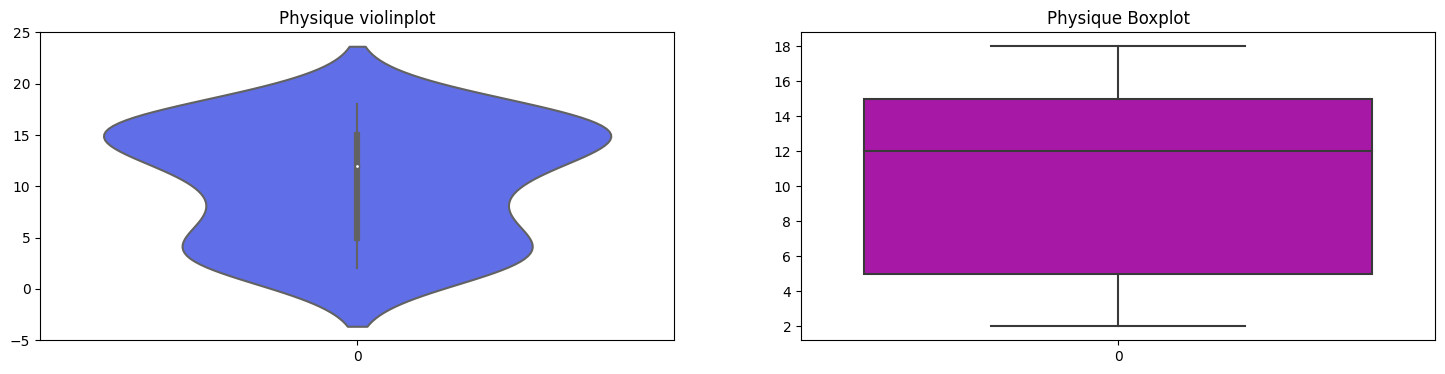

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(18,4), sharex = True)

phy = df['Physique'].values # values


sns.violinplot(phy, hist = False, color = '#495CFF', kde_kws={"shade"}, ax = axes[0]).set_title('Physique violinplot')
sns.boxplot(phy, color ="m", ax=axes[1]).set_title('Physique Boxplot')


plt.show()

<h6><font color = 'green'>Histogramme avec Kernel Density Estimation<font><h6>
<p>Un histogramme avec Kernel Density Estimation (KDE) combine un histogramme, qui représente la fréquence des valeurs d'une variable, avec une courbe lisse (KDE) qui estime la densité de probabilité de la distribution. L'histogramme permet d'observer la répartition des données par intervalles, tandis que le KDE offre une vue plus douce de la distribution, montrant les tendances centrales. Cette visualisation aide à comprendre la forme de la distribution, la concentration des valeurs et fournit des informations sur la densité des données le long de l'axe des valeurs. Cela peut être particulièrement utile pour explorer la distribution d'une variable continue.</p>

<Figure size 1000x600 with 0 Axes>

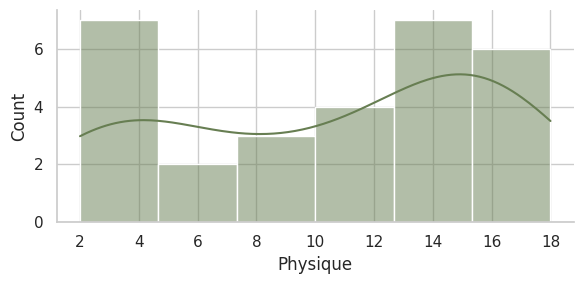

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.displot(df['Physique'], kde=True, color='#677E52', height=3, aspect=2)
plt.show()

<h6><font color = 'green'>Matrice de correlation de la distribution de données<font><h6>
<p>Une matrice de corrélation est une table qui affiche les coefficients de corrélation entre plusieurs variables. Chaque variable de la liste est comparée avec toutes les autres, et les coefficients de corrélation indiquent la force et la direction de la relation linéaire entre les paires de variables. Les valeurs de la matrice varient de -1 à 1, où -1 indique une corrélation négative parfaite, 1 indique une corrélation positive parfaite, et 0 indique l'absence de corrélation linéaire. Cette matrice est largement utilisée en statistiques et en analyse de données pour explorer les relations entre les variables d'un ensemble de données.</p>

In [ ]:
corr_df = df.corr()
print("The correlation DataFrame is:")
print(corr_df, "\n")

The correlation DataFrame is:
             Maths  Physique  Français   Anglais     Latin
Maths     1.000000  0.934525  0.173641  0.176882 -0.045528
Physique  0.934525  1.000000  0.255515  0.248895 -0.022660
Français  0.173641  0.255515  1.000000  0.940047  0.004733
Anglais   0.176882  0.248895  0.940047  1.000000 -0.018248
Latin    -0.045528 -0.022660  0.004733 -0.018248  1.000000 



<ipython-input-22-0ae2207ac049>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()


<ipython-input-23-3a96be096084>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(),dtype = bool))
<ipython-input-23-3a96be096084>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),mask = mask,center = 0,cmap = 'RdBu',linewidth = 1,annot = True,fmt = ".2f",vmin = -1,vmax = 1)


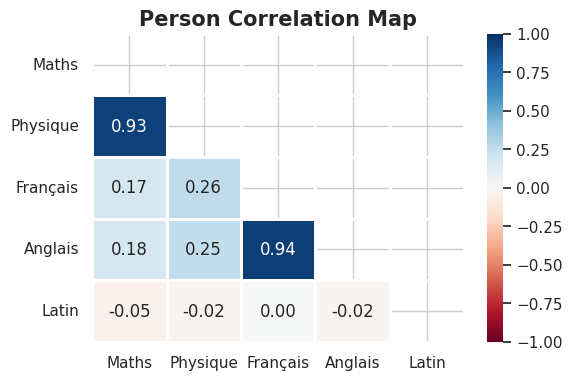

In [ ]:
plt.figure(figsize = (6,4))
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask,center = 0,cmap = 'RdBu',linewidth = 1,annot = True,fmt = ".2f",vmin = -1,vmax = 1)
plt.title("Person Correlation Map",fontsize = 15,fontweight = "bold")
plt.show()

In [ ]:
# dataset sans la colonne 'INDIVIDU'
df_sans_individu = df.drop(columns=['INDIVIDU']).copy()

# dataset avec la colonne 'INDIVIDU'
df_avec_individu = df.copy()


<h2><font color = 'red'> 2- Analyse en Composantes Principales sur les données de note des élèves<font><h2>
<h4>Objectif: Maximiser la variance des données</h4>
<p>Le but d'une analyse en composantes principales est de trouver une nouvelle base orthonormée dans laquelle représenter nos données, telle que la variance des données selon ces nouveaux axes soit maximisée.</p>

In [ ]:
pca = PCA(n_components=5)
pca.fit(df_sans_individu)

PCA(n_components=5)

<h6><font color = 'green'>Ratios de variance expliquée par chaque composante principale.<font><h6>

In [ ]:
pca.explained_variance_ratio_

array([0.60130628, 0.36111826, 0.01766165, 0.01278747, 0.00712634])

<h6><font color = 'green'>Somme cumulée des Ratios de variance expliquée par chaque composante principale.<font><h6>

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.60130628, 0.96242454, 0.98008619, 0.99287366, 1.        ])

<h4><font color = 'green'>Choix du nombre de composants à analyser<font></h4>
<p>Le choix du nombre de composants à conserver après une Analyse en Composantes Principales (PCA) est une étape importante et peut avoir un impact significatif sur les résultats. Plusieurs méthodes peuvent être utilisées pour prendre cette décision. Voici quelques-unes des méthodes couramment employées :</p>
<font color='blue'><ul>
<li>Eblouie des Valeurs propres</li>
<li>Eblouie des Valeurs cumulées </li>
<li>Critère du coude (Elbow Method)</li>
<li>Analyse de scree (Eboulis des valeurs propres)</li>
<li>Critère de l'information bayésienne (BIC) ou critère d'information d'Akaike (AIC)</li>
<li>Validation croisée </li>
</ul><font>

<h4><font color='blue'>2.1. Eblouie des Valeurs propres<font></h4>
<p>Lorsqu'on applique l'Analyse en Composantes Principales (ACP), les données sont projetées sur les axes principaux d'inertie, lesquels sont arrangés en ordre décroissant en fonction de l'inertie du nuage projeté, de la plus grande à la plus petite. En additionnant les inerties associées à tous les axes, on obtient l'inertie totale du nuage des individus.</p>
<p>Les inerties associées à chaque axe, notées Fi, sont équivalentes aux valeurs propres de la matrice de covariance des données.</p>

In [ ]:
eig = pd.DataFrame(
{
    "Dimension": ["F" + str(x + 1) for x in range(5)],
    "Var. expliquée": pca.explained_variance_,
    "% de var. expliquée" : pca.explained_variance_ratio_*100,
    "% cum. var. expliquée" : np.cumsum(pca.explained_variance_ratio_)*100
})
eig

,Dimension,Var. expliquée,% de var. expliquée,% cum. var. expliquée
0,F1,63.612576,60.130628,60.130628
1,F2,38.202932,36.111826,96.242454
2,F3,1.868437,1.766165,98.008619
3,F4,1.352795,1.278747,99.287366
4,F5,0.753900,0.712634,100.000000


<p> Un moyen de représenter cette répartition de l'inertie consiste à afficher un diagramme décrivant le pourcentage d'inertie totale attribué à chaque axe.

Ce diagramme est communément appelé l'éboulis des valeurs propres. Un exemple de ce type de représentation est illustré ci-dessous </p>

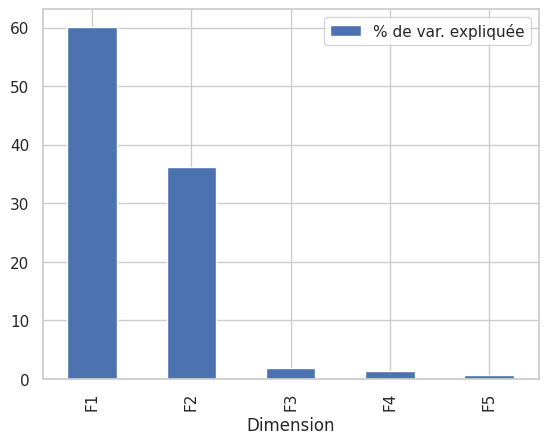

In [ ]:
eig.plot.bar(x = "Dimension", y = "% de var. expliquée")
plt.show()

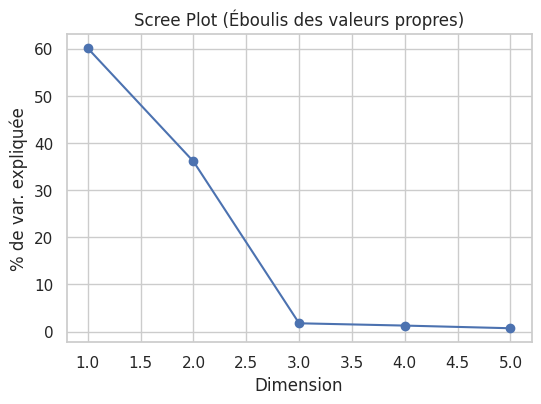

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(eig.index + 1, eig['% de var. expliquée'], marker='o')
plt.xlabel('Dimension')
plt.ylabel('% de var. expliquée')
plt.title('Scree Plot (Éboulis des valeurs propres)')
plt.show()

In [ ]:
scores_pca=pca.transform(df_sans_individu)

In [ ]:
df_pca = pd.DataFrame({
    "INDIVIDU" : df_avec_individu.iloc[:,0],
    "F1" : scores_pca[:,0],
    "F2" : scores_pca[:,1],
    "F3" : scores_pca[:,2],
    "F4" : scores_pca[:,3],
    "F5" : scores_pca[:,4]
})
df_pca.head()

,INDIVIDU,F1,F2,F3,F4,F5
0,Basile,-5.502861,-0.482371,-1.343591,0.305881,-0.255042
1,Thierry,13.337810,-1.603566,-0.887365,1.155034,0.663026
2,Genevieve,-1.585764,-9.725816,0.059376,-0.971818,-1.038787
3,Odilon,-5.574741,-11.309374,-0.223947,-0.115933,0.902243
4,Edouard,-7.913141,2.176463,0.069164,-1.443586,-0.000809


<h4><font color='blue'>2.2. Eblouie des Valeurs cumulées<font></h4>

Text(0, 0.5, 'Cumule des axes factoriels')

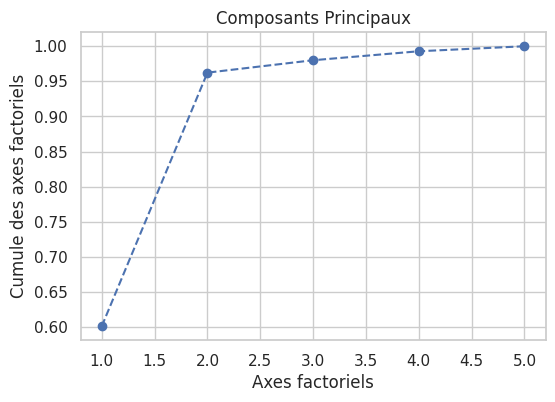

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(range(1,6) , pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title("Composants Principaux")
plt.xlabel("Axes factoriels")
plt.ylabel("Cumule des axes factoriels")

<h4><font color = 'green'>Le cercle des correlations<font></h4>
<h4><font color='blue'>Position des variables<font></h4>
<p> Chaque variable originale(Math,Physique,Français,Anglais,Latin) est représentée par un vecteur dans le cercle de corrélation. La direction de ce vecteur indique la corrélation de la variable avec les composantes principales, et sa longueur indique la force de cette corrélation.</p>
<h4><font color='blue'>Proximité au cercle<font></h4>
<p>Les variables qui sont proches du cercle(Math,Physique,Français,Anglais) sont bien représentées par les composantes principales. Plus précisément, si un vecteur est proche du bord du cercle, cela signifie qu'il a une corrélation élevée avec la composante principale correspondante. Les variables situées près du centre du cercle ont une faible corrélation avec les composantes principales(Latin).</p>
<h4><font color='blue'>Angle entre les Variables<font> </h4>
<p>L'angle entre deux vecteurs représente la corrélation entre les deux variables correspondantes. Si deux vecteurs pointent dans la même direction, les variables correspondantes sont fortement corrélées (Math et Physique sont fortement corrélées d'une part et Français et Anglais sont également fortement corrélées d'autre part). Si les vecteurs sont à 90 degrés l'un de l'autre, les variables sont non corrélées(Math et Français sont non corrélées).</p>
<h4><font color='blue'>Contribution à l'Inertie<font> </h4>
<p> La variance expliquée par chaque composante principale est également représentée dans le cercle de corrélation. Les variables qui contribuent fortement à l'inertie de la composante principale sont situées près du bord du cercle.</p>


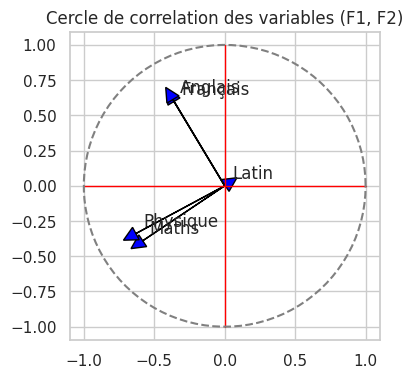

In [ ]:
(fig, ax) = plt.subplots(figsize=(4, 4))  # la taille de la figure
l = ['Maths', 'Physique', 'Français', 'Anglais', 'Latin']

for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Commencez la flèche à l'origine
             pca.components_[0, i],  # 0 pour PC1
             pca.components_[1, i],  # 1 pour PC2
             head_width=0.1,
             head_length=0.1,
             fc='blue',  # Couleur de la flèche
             ec='black')  # Couleur du contour

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             l[i])

plt.plot([-1, 1], [0, 0], color='red', linestyle='-', linewidth=1)
plt.plot([0, 0], [-1, 1], color='red', linestyle='-', linewidth=1)
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an), color='gray', linestyle='--')  # un cercle unitaire pour l'échelle
plt.axis('equal')
ax.set_title('Cercle de correlation des variables (F1, F2)')
plt.grid(True)  # une grille pour une meilleure lisibilité
plt.show()


<h4><font color = 'green'>Projection des données dans le Premier Plan Factoriel<font></h4>

In [ ]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            fig = plt.figure(figsize=(7,6))

            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center')

            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])

            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)


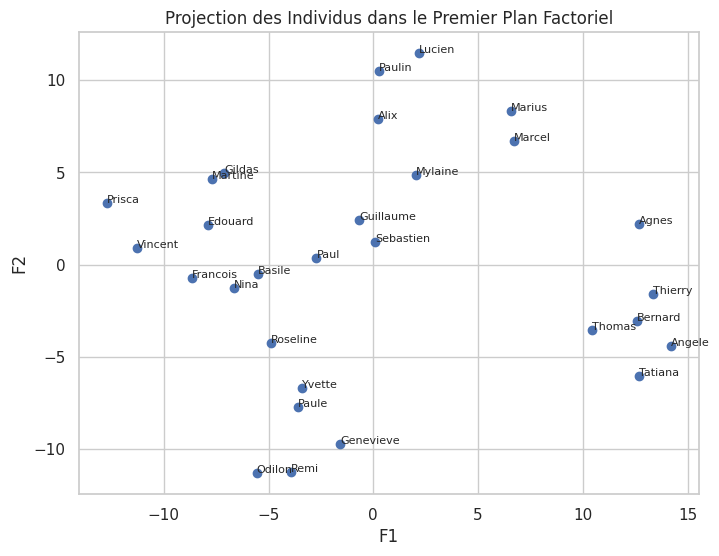

In [ ]:
# Affichage de la projection des individus avec les noms
plt.figure(figsize=(8, 6))
plt.scatter(scores_pca[:, 0], scores_pca[:, 1])

# Affichage des noms des individus à chaque point
for i, txt in enumerate(df_pca["INDIVIDU"]):
    plt.annotate(txt, (scores_pca[i, 0], scores_pca[i, 1]), fontsize=8)

plt.xlabel('F1')
plt.ylabel('F2')
plt.title('Projection des Individus dans le Premier Plan Factoriel')
plt.show()

<h4> <font color='red'> Question: <font></h4>
<p>Interpréter le résultat obtenu après la projection des données dans le premier plan factoriel</p>

<h4> <font color='green'> Réponse: <font></h4>

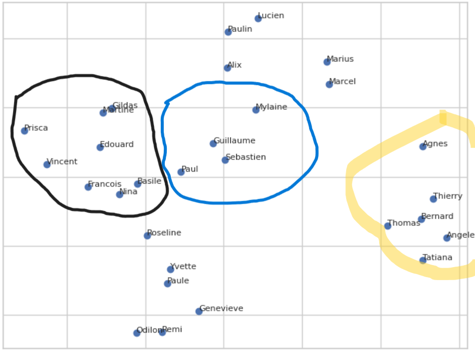

In [ ]:
from PIL import Image
import IPython.display as display

# Spécifiez le chemin de l'image dans votre Google Drive
image_path = "/content/drive/MyDrive/IndabaXTogo/PraticalSession/images/image.PNG"

# Chargez l'image
image = Image.open(image_path)

# Réduisez la taille de l'image (par exemple, à 50% de la taille d'origine)
new_size = (image.width // 2, image.height // 2)
resized_image = image.resize(new_size)

# Affichez l'image redimensionnée
display.display(resized_image)



<h1><font color='red'>IV- Réduction de dimension Non supervisé, non linéaire </font></h1>

<h2><font color='red'>1 - Le T-SNE sur les données générées (demi-lunes) <font></h2>
Niveau: <font color='red'>`Intermédiaire`</font>
<h4><font color='blue'>Description de la méthode<font></h4>
L'algorithme t-SNE se déroule en trois étapeshttps://datascientest.com/comprendre-lalgorithme-t-sne-en-3-etapes :

•  Étape 1 : On calcule les similarités entre les points dans l'espace d'origine en utilisant des distributions gaussiennes centrées sur chaque point. On obtient ainsi des probabilités conditionnelles qui mesurent la densité de chaque point sous la distribution de son voisin.

•  Étape 2 : On crée un espace de dimension réduite et on répartit aléatoirement les points dans cet espace. On calcule ensuite les similarités entre les points dans cet espace en utilisant des distributions de Student, qui sont plus lourdes que les gaussiennes. On obtient ainsi des probabilités jointes qui mesurent l'attraction entre les points.

•  Étape 3 : On minimise la divergence de Kullback-Leibler entre les deux distributions de probabilités, c'est-à-dire qu'on cherche à faire coïncider les similarités dans les deux espaces. On utilise pour cela une méthode de descente de gradient stochastique, qui ajuste progressivement les positions des points dans l'espace réduit.

<h4><font color='blue'>Comprendre la donnée<font></h4>
<p>Dans cette partie, nous allons travailler avec le jeu de données des « lunes ». Il s’agit d’un jeu de données bidimensionnel où le nuage des observations prend la forme de deux demi-lunes imbriquées. Ces deux groupes ne sont pas linéairement séparables. scikit-learn dispose d’une fonction intégrée pour générer une matrice d’observations correspondant aux demi-lunes dans sklearn.datasets.make_moons.</p>

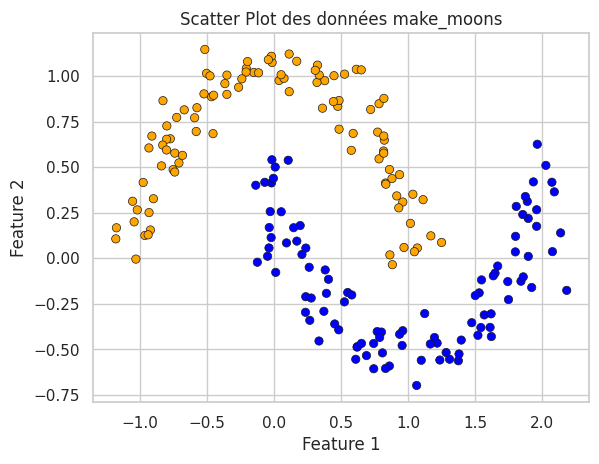

In [ ]:
# Génération des données
X, y = make_moons(n_samples=200, noise=0.1)

# Création d'une palette de couleurs pour les points
colors = ['orange' if label == 0 else 'blue' for label in y]

# Affichage du nuage de points avec des couleurs attrayantes
plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='k', linewidth=0.5)

# Affichage
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot des données make_moons')
plt.show()

<h4><font color='blue'>Implémentation de T-SNET<font></h4>
<p>Le nombre de dimensions de l’espace réduit est spécifié dans le paramètre <font color = 'orange'>n_components</font>, comme dans le cas du PCA. Par défaut, scikit-learn projette les données dans un espace bidimensionnel à des fins de visualisation <font color = orange>(n_components=2)</font> mais il est bien entendu possible de choisir un espace de n’importe quelle dimension.</p>

<p>Le paramètre le plus important de t-SNE est la <font color = green>perplexité</font>, définie par la valeur du paramètre <font color = orange>perplexity</font>. Pour rappel, la perplexité correspond à la variance de la gaussienne utilisée pour calculer les similarités entre les paires de points dans l’espace de départ. Plus la perplexité est élevée, plus les voisins éloignés d’un point seront considérés. À l’inverse, une perplexité faible n’accordera d’importance qu’aux voisins les plus proches du point. En d’autres termes, augmenter la perplexité renforce l’importance accordée à la structure globale du jeu de données, tandis qu’une perplexité faible accorde plus d’importance aux structures locales. Par défaut, <font color = orange>perplexity=30</font> dans scikit-learn.</p>

<p>Un dernier paramètre d’intérêt de TSNE est le paramètre <font color = orange>init</font> qui contrôle la méthode d’initialisation des points dans l’espace réduit. De cette initialisation dépend en grande partie la visualisation obtenue par t-SNE puisque les points seront ensuite déplacés par la descente de gradient. Leur position initiale peut donc grandement affecter les résultats. Par défaut, TSNE utilise une initialisation aléatoire <font color = orange>(init="random")</font> mais ce comportement peut être modifié pour commencer par appliquer un PCA sur les données pour placer les points initiaux dans l’espace réduit <font color = orange>(init="pca")</font>. L’initialisation par ACP est généralement plus stable.</p>

<hr>

Outre les paramètres généraux de l’algorithme, l’optimisation de TSNE peut être modifiée à l’aide des paramètres optionnels suivants:

<font color = orange>early_exaggeration</font>: facteur d’exagération des similarités pour la phase initiale de l’optimisation.

<font color = orange>learning_rate</font>: détermine le pas de l’algorithme de descente de gradient. L’utilisation de la valeur <font color = green>"auto"</font> est recommandée.

<font color = orange>n_iter</font>: nombre d’itérations de la descente de gradient. Il peut être utile d’augmenter ce paramètre si t-SNE ne converge pas dans le temps imparti.

<font color = orange>method</font>: ("barnes_hut" par défaut, accepte aussi la valeur "exact"): définit la méthode utilisée pour le calcul du gradient. Par défaut, TSNE utilise la méthode de Barnes-Hut qui est une approximation en O(NlogN) plutôt que la méthode exacte en O(N2)

En règle générale, il est souhaitable de standardiser les données avant d’appliquer t-SNE.

Les méthodes qui peuvent être employées sont :

<font color = orange>fit(X)</font>: calcul du modèle à partir des observations qui sont les lignes de X. Les valeurs réduites sont ensuite accessibles dans l’attribut <font color = green>.embeddings_</font>.

<font color = orange>fit_transform(X)</font>: calcule le modèle à partir des observations qui sont les lignes de X et renvoie la matrice des observations réduites.

<h4><font color = blue>Réduction de dimension des données demi-lunes<font></h4>

<p>Nous pouvons appliquer l’algorithme t-SNE sur les demi-lunes afin de projeter les points sur une droite. Dans ce cas, le nombre de composantes de l’espace cible vaut 1. Nous laissons les paramètres par défaut de t-SNE pour l’instant.</p>

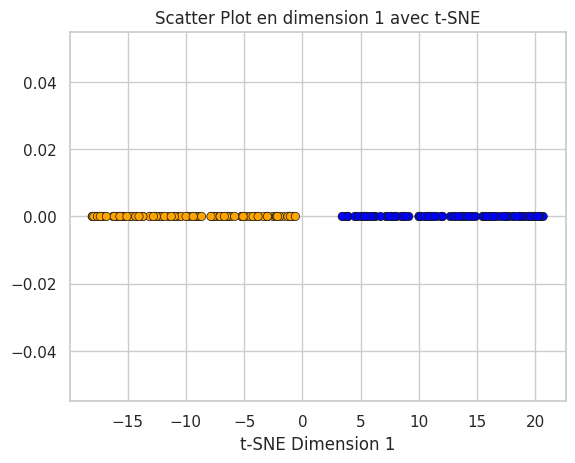

In [ ]:
# Création d'une palette de couleurs pour les points
colors = ['orange' if label == 0 else 'blue' for label in y]

# Réduction de dimension avec t-SNE
tsne = TSNE(n_components=1, perplexity=30)
embedding = tsne.fit_transform(X)

# Affichage du nuage de points en dimension 1 avec des couleurs attrayantes
plt.scatter(embedding[:, 0], np.zeros(len(embedding)), c=colors, edgecolors='k', linewidth=0.5)

# Affichage
plt.xlabel('t-SNE Dimension 1')
plt.title('Scatter Plot en dimension 1 avec t-SNE')
plt.show()



<h4> <font color='red'> Question: <font></h4>
<p>Appliquer TSNE à 10 reprises avec la méthode d’initialisation random. Calculer la moyenne et l’écart-type des valeurs finales de divergence de Kullback-Leibler obtenues (attribut .kl_divergence_).

Répéter avec la méthode d’initialisation pca et comparer les résultats.

Que constatez-vous ?</p>

<h4> <font color='green'> Réponse: <font></h4>

In [ ]:
divergences = []

for i in range(10):
    tsne = TSNE(n_components=1, perplexity=30, init="pca").fit(X)
    divergences.append(tsne.kl_divergence_)

print(f"KL-divergence moyenne: {np.mean(divergences):.2f} +- {np.std(divergences):.2f}")

KL-divergence moyenne: 0.16 +- 0.00


In [ ]:
divergences_ran = []

for i in range(10):
    tsne_ran = TSNE(n_components=1, perplexity=30, init="random").fit(X)
    divergences_ran.append(tsne_ran.kl_divergence_)

print(f"KL-divergence moyenne: {np.mean(divergences_ran):.2f} +- {np.std(divergences_ran):.2f}")

KL-divergence moyenne: 0.16 +- 0.00


<p><font color =grey>L'écart-type nul veut simplement dire que l'algorithme converge cependant la qualité de la représentation est donnée par la divergence de KL.</font></p>
<p>La divergence KL moyenne est plus faible avec un écart-type plus resserré dans le cas de l’initialisation pca. Ce résultat est attendu: cette initialisation est plus stable que l’initialisation aléatoire utilisée par défaut.</p>

<p>Pour mieux comprendre l’impact de la valeur de la perplexité sur les résultats de la réduction de dimension obtenue par t-SNE, il peut être instructif d’appliquer l’algorithme sur des données bidimensionnelles sans changer la dimension. Cela permet de “simplifier” les données en cherchant, dans un espace de même dimension, une matrice d’observations qui a le même “structure” que celle des données initiales. Ce n’est pas une opération que l’on réaliserait en temps normal mais qui est riche d’enseignements pour se construire une intuition dans un TP.</p>

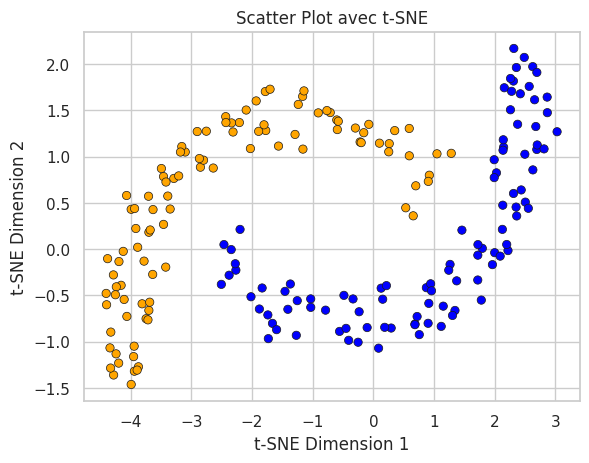

In [ ]:
# Réduction de dimension avec t-SNE
tsne = TSNE(n_components=2, perplexity=100)
embedding = tsne.fit_transform(X)

# Affichage du nuage de points
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors, edgecolors='k', linewidth=0.5)

# Affichage
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Scatter Plot avec t-SNE')
plt.show()


<h4> <font color='red'> Question: <font></h4>
<p>

Expérimenter avec différentes valeurs pour le paramètre de perplexité. Que constatez-vous ?</p>

<h4> <font color='green'> Réponse: <font></h4>
<p>Avec une perplexité faible, les demi-lunes sont fragmentées et fortement détachées: t-SNE surdivise les groupes en se concentrant sur les structures locales.

Avec une perplexité élevée, on retrouve la structure globale du jeu de données et t-SNE reproduit presque exactement les demi-lunes.</p>

<h2><font color='red'>2 - Le T-SNE sur les données Digits </font></h2>
Niveau: <font color='red'>`Avancé`</font>
<h4><font color='blue'>Comprendre la donnée<font></h4>
<p>Digits est un jeu de données contenant des images en niveaux de gris de chiffres manuscrits de 8×8=64 pixels. Il comporte 1797 observations réparties en 10 classes, une par chiffre. Un total de 43 personnes ont participé à la collecte de données. Les valeurs de pixels sont des entiers dans l’intervalle [0,16]. Plus d’informations sont disponibles dans la documentation de scikit-learn.</p>

Valeurs de pixel de l'image du chiffre 0 :

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


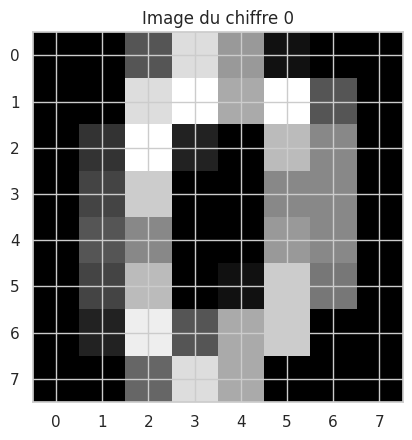

In [ ]:
# Charger le jeu de données Digits
digits = load_digits()

# Sélectionner une image du jeu de données
index_image = 0
selected_image = digits.data[index_image]
image_label = digits.target[index_image]

# Reshape pour obtenir les valeurs de pixel sous forme de matrice 8x8
pixel_values = selected_image.reshape(8, 8)

# Afficher les valeurs de pixel correspondantes
print(f'Valeurs de pixel de l\'image du chiffre {image_label} :\n')
print(pixel_values)

# Afficher l'image
plt.imshow(pixel_values, cmap='gray', interpolation='nearest')
plt.title(f'Image du chiffre {image_label}')
plt.show()

<h4> <font color='red'> Question: <font></h4>
<p>Appliquer une analyse en composantes principales sur le jeu de données Digits. Visualiser le nuage de points projeté sur les deux premières composantes principales.</p>

<h4> <font color='green'> Réponse: <font></h4>

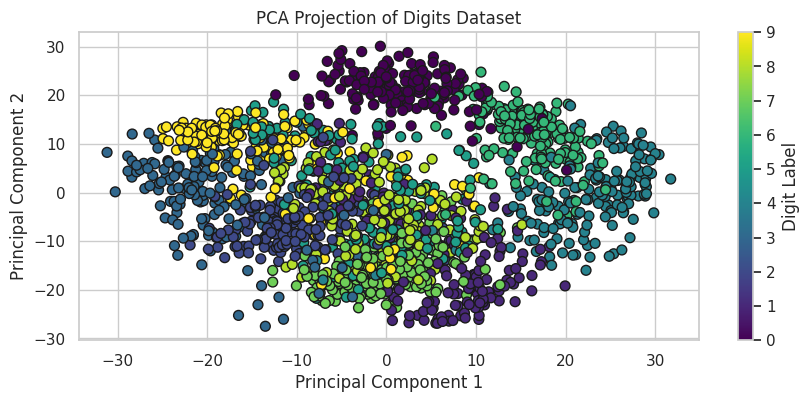

In [ ]:
# Charger le jeu de données Digits
digits = load_digits()
X = digits.data
y = digits.target

# Appliquer l'analyse en composantes principales (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualiser le nuage de points projeté sur les deux premières composantes principales
plt.figure(figsize=(10, 4))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.colorbar(scatter, label='Digit Label')
plt.title('PCA Projection of Digits Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


<h4> <font color='red'> Question: <font></h4>
<p>Appliquer une réduction de dimension à l’aide de t-SNE (n_components=2) sur le jeu de données Digits puis afficher le nuage de points résultant. Varier la valeur du coefficient de perplexité dans une plage raisonnable (entre 5 et 100, par exemple). Que constatez-vous ?</p>

<h4> <font color='green'> Réponse: <font></h4>

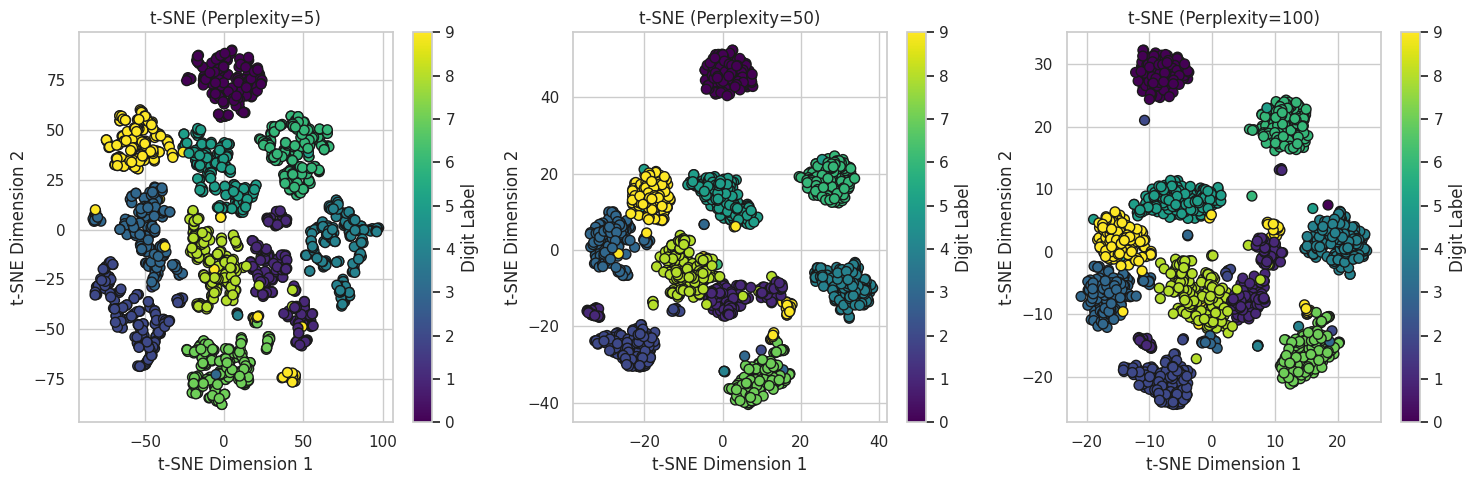

In [ ]:
# Varier la perplexité dans une plage raisonnable
perplexities = [5, 50, 100]

# Appliquer t-SNE avec différentes perplexités et afficher les résultats
plt.figure(figsize=(15, 5))
for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)

    plt.subplot(1, 3, i + 1)
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.title(f't-SNE (Perplexity={perplexity})')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.colorbar(scatter, label='Digit Label')

plt.tight_layout()
plt.show()

<p>Avec une perplexité faible, on ne distingue pas les groupes correspondant aux classes: des chiffres très similaires sont rapprochés mais ne sont pas connectés avec les autres du même groupe. Une perplexité forte capte mieux la structure globale et le positionnement des groupes entre eux.</p>

<h2><font color='red'>3 - Le T-SNET sur les données de Olivetti Faces </font></h2>
Niveau: <font color='red'>`Avancé`</font>
<h4><font color='blue'>Comprendre la donnée<font></h4>
<p>Le jeu de données Olivetti Faces est une collection de 400 images en niveaux de gris de visages provenant de 40 sujets différents prises entre 1992 et 1994 par AT&T Laboratories chacun photographié dix fois sous diverses expressions, conditions d'éclairage et orientations de tête. Chaque image a une taille de 64 x 64 pixels et une valeur de gris entre 0 et 1.</p>


<p>Chaque image est composée de pixels, qui sont les plus petits éléments visibles sur un écran. Un pixel peut avoir une couleur ou une nuance de gris. La taille d'une image est le nombre de pixels qu'elle contient en largeur et en hauteur. Par exemple, une image de taille 64 x 64 pixels contient 64 pixels sur chaque ligne et chaque colonne, soit un total de 4096 pixels.

La valeur de gris d'un pixel est un nombre qui indique son intensité lumineuse. Plus la valeur est proche de 0, plus le pixel est sombre. Plus la valeur est proche de 1, plus le pixel est clair. Par exemple, un pixel de valeur 0 est noir, un pixel de valeur 0.5 est gris moyen, et un pixel de valeur 1 est blanc.

Voici un exemple d'image de taille 64 x 64 pixels et de valeur de gris entre 0 et 1 :

0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09
0.00 0.00 0.00 0.00 0.00 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10
0.00 0.00 0.00 0.00 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11
0.00 0.00 0.00 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12
0.00 0.00 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13
0.00 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14 0.15
0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14 0.15 0.16
0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14 0.15 0.16 0.17
0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18
0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19
0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.20
0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.20 0.21
0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.20 0.21 0.22
0.08 0.09 0.10 0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.20 0.21 0.22 0.23
0.09 0.10 0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.20 0.21 0.22 0.23 0.00
</p>



<p>L'algorithme t-SNE (t-Distributed Stochastic Neighbor Embedding) est utilisé pour la réduction de dimension des données Olivetti Faces en préservant les structures locales et les relations non linéaires entre les visages. Il mappe les images 64x64 des visages en un espace bidimensionnel (2D) de manière à ce que les visages similaires soient proches les uns des autres. Cette visualisation permet une compréhension intuitive des similarités entre les visages.</p>

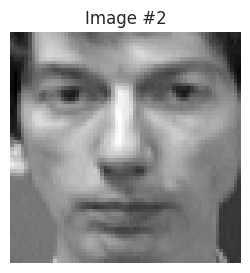

Valeurs de pixel de l'image #2 :
[0.18595041 0.12809917 0.11570248 ... 0.19008264 0.2107438  0.2107438 ]


In [ ]:
# Charger le jeu de données Olivetti Faces
olivetti_faces = fetch_olivetti_faces(shuffle=True, random_state=42)

# Sélectionner une image spécifique (par exemple, la première image)
image_index = 1
selected_image = olivetti_faces.images[image_index]
pixel_values = selected_image.ravel()

# Afficher l'image
plt.figure(figsize=(3, 3))
plt.imshow(selected_image, cmap='gray')
plt.title(f'Image #{image_index + 1}')
plt.axis('off')
plt.show()

# Afficher les valeurs de pixel associées
print(f"Valeurs de pixel de l'image #{image_index + 1} :")
print(pixel_values)


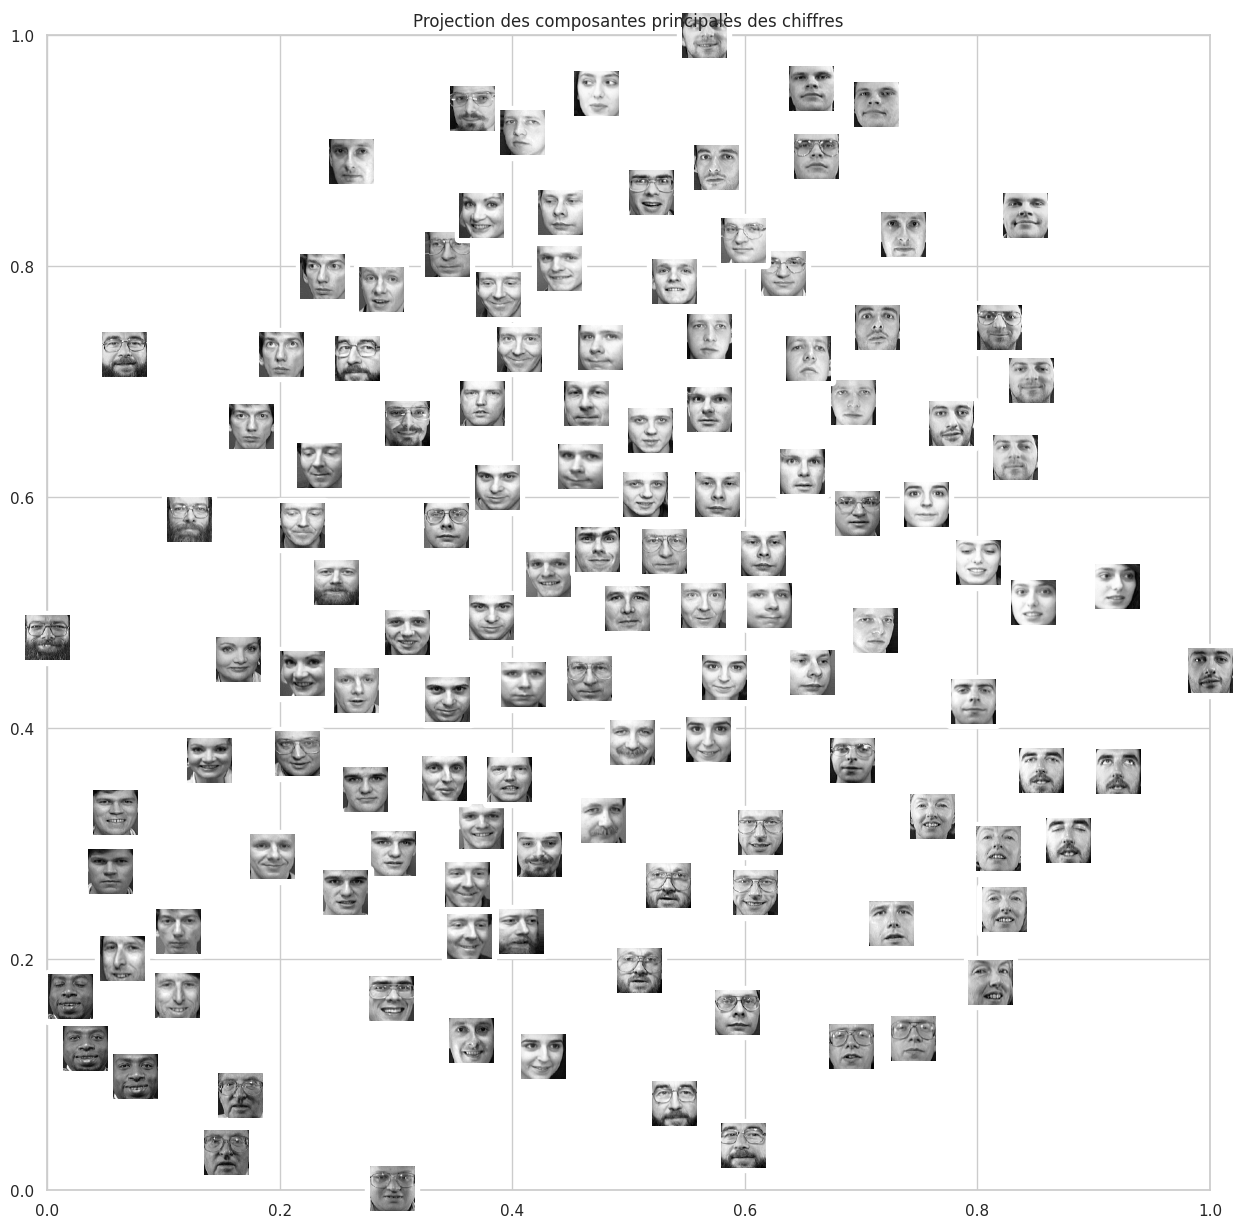

In [ ]:
olivetti = fetch_olivetti_faces()
targets = olivetti.target
data = olivetti.data
images = olivetti.images

# fonction pour afficher une partie des images sur la visualisation 2D
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(15, 15))
    ax = plt.subplot(111)

    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([[1., 1.]])
        for i in range(data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 2e-3:
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            props={ 'boxstyle':'round', 'edgecolor':'white'}
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap=plt.cm.gray, zoom=0.5), X[i], bboxprops=props)
            ax.add_artist(imagebox)
    if title is not None:
        plt.title(title)


X = data
tsne = manifold.TSNE(n_components=2, perplexity=100, n_iter=3000, init='pca')
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne, "Projection des composantes principales des chiffres")
plt.show()